In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.QED import qed
from rdkit.Chem.Crippen import MolLogP

IPythonConsole.ipython_useSVG=True 

In [5]:
import sys
from io import StringIO

In [6]:
dataset_moses  = pd.read_csv("../data/interim/moses.csv")
dataset_guacamol  = pd.read_csv("../data/interim/guacamol.csv")

In [7]:
dataset_moses_test= dataset_moses[dataset_moses["SPLIT"]== "test"]
dataset_guacamol_test= dataset_guacamol[dataset_guacamol["SPLIT"]== "test"]

dataset_moses_test["mol"]= dataset_moses_test["SMILES"].apply(Chem.MolFromSmiles)
dataset_guacamol_test["mol"]=  dataset_guacamol_test["SMILES"].apply(Chem.MolFromSmiles)

#dataset_moses["mol"]= dataset_moses["SMILES"].apply(Chem.MolFromSmiles)
#dataset_guacamol["mol"]=  dataset_guacamol["SMILES"].apply(Chem.MolFromSmiles)

/tmp/ipykernel_93454/282615113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_moses_test["mol"]= dataset_moses_test["SMILES"].apply(Chem.MolFromSmiles)
/tmp/ipykernel_93454/282615113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_guacamol_test["mol"]=  dataset_guacamol_test["SMILES"].apply(Chem.MolFromSmiles)


In [11]:

dataset_moses_test["qed"] = dataset_moses_test["mol"].apply(qed)
dataset_guacamol_test["qed"]=  dataset_guacamol_test["mol"].apply(qed)



#dataset_moses["qed"] = dataset_moses["mol"].apply(qed)
#dataset_guacamol["qed"]=  dataset_guacamol["mol"].apply(qed)


/tmp/ipykernel_93454/3940353172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_moses_test["qed"] = dataset_moses_test["mol"].apply(qed)
/tmp/ipykernel_93454/3940353172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_guacamol_test["qed"]=  dataset_guacamol_test["mol"].apply(qed)


In [22]:
n = 500

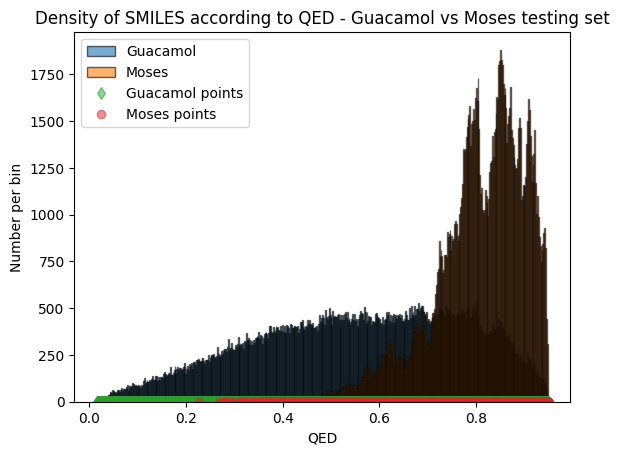

In [35]:



# Compute bins for both datasets
qed_max1 = dataset_guacamol_test["qed"].max()
qed_min1 = dataset_guacamol_test["qed"].min()
qed_max2 = dataset_moses_test["qed"].max()
qed_min2 = dataset_moses_test["qed"].min()

qed_min = min(qed_min1, qed_min2)
qed_max = max(qed_max1, qed_max2)

bin_width = (qed_max - qed_min) / n
x_bins = [qed_min + k * bin_width for k in range(n+1)]

# Create the plot
fig, ax = plt.subplots()

# Plot histograms
ax.hist(dataset_guacamol_test["qed"], bins=x_bins, alpha=0.6, label='Guacamol', edgecolor='black')
ax.hist(dataset_moses_test["qed"], bins=x_bins, alpha=0.6, label='Moses', edgecolor='black')

# Optionally: overlay scatter points at y=0 for both datasets
ax.plot(dataset_guacamol_test["qed"], [0]*len(dataset_guacamol_test), 'd', label='Guacamol points', alpha=0.5)
ax.plot(dataset_moses_test["qed"], [0]*len(dataset_moses_test), 'o', label='Moses points', alpha=0.5)

# Labels and title
ax.set_ylabel('Number per bin')
ax.set_xlabel('QED')
ax.set_title('Density of SMILES according to QED - Guacamol vs Moses testing set')
ax.legend()

plt.show()


In [36]:
dataset_moses_test["logP"] = dataset_moses_test["mol"].apply(MolLogP)
dataset_guacamol_test["logP"]=  dataset_guacamol_test["mol"].apply(MolLogP)



/tmp/ipykernel_93454/724652752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_moses_test["logP"] = dataset_moses_test["mol"].apply(MolLogP)
/tmp/ipykernel_93454/724652752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_guacamol_test["logP"]=  dataset_guacamol_test["mol"].apply(MolLogP)


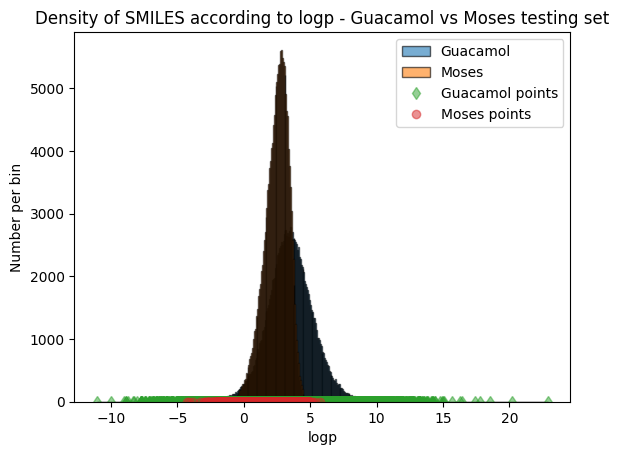

In [38]:

# Compute bins for both datasets
logp_max1 = dataset_guacamol_test["logP"].max()
logp_min1 = dataset_guacamol_test["logP"].min()
logp_max2 = dataset_moses_test["logP"].max()
logp_min2 = dataset_moses_test["logP"].min()

logp_min = min(logp_min1, logp_min2)
logp_max = max(logp_max1, logp_max2)

bin_width = (logp_max - logp_min) / n
x_bins = [logp_min + k * bin_width for k in range(n+1)]

# Create the plot
fig, ax = plt.subplots()

# Plot histograms
ax.hist(dataset_guacamol_test["logP"], bins=x_bins, alpha=0.6, label='Guacamol', edgecolor='black')
ax.hist(dataset_moses_test["logP"], bins=x_bins, alpha=0.6, label='Moses', edgecolor='black')

# Optionally: overlay scatter points at y=0 for both datasets
ax.plot(dataset_guacamol_test["logP"], [0]*len(dataset_guacamol_test), 'd', label='Guacamol points', alpha=0.5)
ax.plot(dataset_moses_test["logP"], [0]*len(dataset_moses_test), 'o', label='Moses points', alpha=0.5)

# Labels and title
ax.set_ylabel('Number per bin')
ax.set_xlabel('logp')
ax.set_title('Density of SMILES according to logp - Guacamol vs Moses testing set')
ax.legend()

plt.show()